## Tasks for Step 4

In [1]:
# TODO: re-load dataframes from SQL
import sqlite3
engine = sqlite3.connect('HW1_DB')
import pandas as pd
incidents_df = pd.read_sql('select * from incidents', engine)
airlines_df = pd.read_sql('select * from airlines', engine)
airports_df = pd.read_sql('select * from airports', engine)
routes_df = pd.read_sql('select * from routes', engine)

In [2]:
routes_df.to_csv('routes.csv')

In [3]:
# TODO: airports_df.info(), airlines_df.info(), routes_df.info() and incidents_df.info()
airports_df.info()
airlines_df.info()
routes_df.info()
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
airport_id        8107 non-null int64
airport_name      8107 non-null object
city              8107 non-null object
airport_county    8107 non-null object
faa               8107 non-null object
airport_icao      8107 non-null object
lat               8107 non-null float64
lon               8107 non-null float64
alt               8107 non-null int64
timezone          8107 non-null float64
dst               8107 non-null object
tz                8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
airline_id        6048 non-null int64
airline_name      6048 non-null object
alias             6048 non-null object
iata              6048 non-null object
airline_icao      6048 non-null object
callsign          6048 non-null object
airline_county    604

## Step 4.0

In [4]:
#TODO: output airports_dfirports_df.head()

In [5]:
#TODO: output airports_df.describe()
airports_df.describe()

,airport_id,lat,lon,alt,timezone
count,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000
mean,4766.361046,26.817720,-3.921969,933.449365,0.169236
std,2943.205193,27.866953,85.900873,1624.740899,5.737326
min,1.000000,-89.999997,-179.877000,-1266.000000,-12.000000
25%,2091.500000,8.824928,-79.022498,38.000000,-5.000000
50%,4257.000000,34.987800,5.292028,272.000000,1.000000
75%,7508.500000,47.957599,49.785821,1020.000000,4.000000
max,9541.000000,82.517778,179.951000,14472.000000,13.000000


In [6]:
#TODO: output airlines_df
airlines_df.head()

,airline_id,airline_name,alias,iata,airline_icao,callsign,airline_county,airline_Y
0,1,Private flight,,-,,,,Y
1,2,135 Airways,,,GNL,GENERAL,United States,N
2,3,1Time Airline,,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,,,WYT,,United Kingdom,N
4,5,213 Flight Unit,,,TFU,,Russia,N


In [7]:
#TODO: output airlines_df.describe()
airlines_df.describe()

,airline_id
count,6048.000000
mean,3844.729167
std,3945.495487
min,-1.000000
25%,1512.750000
50%,3025.500000
75%,4543.250000
max,19845.000000


In [8]:
#TODO: output routes_df
routes_df.head()
len(routes_df)

66548

In [9]:
#TODO: output routes_df.describe()
routes_df.describe()

,r_airline_id,source_airport_id,destin_airport_id,stops
count,66548.000000,66548.000000,66548.000000,66548.000000
mean,3367.569754,2660.201929,2662.088192,0.000165
std,3182.024330,1577.965637,1578.661433,0.012856
min,10.000000,1.000000,1.000000,0.000000
25%,1317.000000,1382.000000,1382.000000,0.000000
50%,2942.000000,2958.000000,2958.000000,0.000000
75%,4608.000000,3670.000000,3670.000000,0.000000
max,19676.000000,9327.000000,9327.000000,1.000000


In [10]:
#TODO: output incidents_df
incidents_df.head()

,Date,Airline,FlightNum
0,1997-01-09 00:00:00,Comair,3272
1,1997-03-18 00:00:00,Stavropolskaya Aktsionernaya Avia,1023
2,1997-04-19 00:00:00,Merpati Nusantara Airlines,106
3,1997-05-08 00:00:00,China Southern Airlines,3456
4,1997-07-31 00:00:00,FedEx Express,14


In [11]:
#TODO: output incidents_df.describe()
incidents_df.describe()

,Date,Airline,FlightNum
count,317,317,317
unique,304,235,297
top,2001-09-11 00:00:00,Turkish Airlines,120
freq,4,6,3


## Step 4.1

In [12]:
# TODO: output dictionary {‘airports’: ___, ‘destinations’: ___, ‘sources’: ___}
d = {}
d['airports']= airports_df["airport_id"].nunique()
d['destinations']=routes_df["destin_airport_id"].nunique()
d['sources']= routes_df["source_airport_id"].nunique()
#num =len(a['b].value_counts())
print(d)

{'airports': 8107, 'destinations': 3170, 'sources': 3167}


## Step 4.2.1

In [13]:
# TODO: output airports you can fly to by not from
new = routes_df.filter(['source_airport_id', 'destin_airport_id'], axis=1)
a = new.source_airport_id.isin(new.destin_airport_id)
dif_a = [not f for f in a]#list
res = new[dif_a] #dataframe
#list(set(a['b])-set(c['d']))
res.drop_duplicates(subset=['destin_airport_id']) 
res.index = [i for i in range(len(res))]

new_res = res.merge(airports_df, left_on='destin_airport_id', right_on='airport_id', how='inner')#why inner?
new_res = new_res.filter(['destin_airport_id','airport_name'])#pd.dataframe(a,columns=[''])
print(new_res)

    destin_airport_id                   airport_name
0                1869         Marcos A Gelabert Intl
1                1074                Mohammed V Intl
2                1036                           Goma
3                1032                         Matari
4                1020                    Ndjili Intl
5                7153           Chignik Lake Airport
6                3794                    King Salmon
7                2006                  Auckland Intl
8                8243  Sao Felix do Araguaia Airport
9                8239    Ourilandia do Norte Airport
10               3334             Melbourne Essendon
11               1382              Charles De Gaulle
12               3967                    Asmara Intl


## Step 4.2.2

In [14]:
#TODO: top 10 most popular airports
dest = pd.merge(routes_df,airports_df, how="inner",left_on="destin_airport_iata_icao",right_on="airport_icao")
dest.head()

,airline_iata_icao,r_airline_id,source_airport_iata_icao,source_airport_id,destin_airport_iata_icao,destin_airport_id,Y,stops,equipment,airport_id,...,city,airport_county,faa,airport_icao,lat,lon,alt,timezone,dst,tz
0,AS,439,PDX,3720,PSC,6133,Y,0,DH4,6133,...,Pasco,United States,PSC,PSC,46.2647,-119.119,410,-8.0,A,America/Los_Angeles
1,AS,439,SEA,3577,PSC,6133,Y,0,DH4,6133,...,Pasco,United States,PSC,PSC,46.2647,-119.119,410,-8.0,A,America/Los_Angeles
2,DL,2009,MSP,3858,PSC,6133,Y,0,CR9,6133,...,Pasco,United States,PSC,PSC,46.2647,-119.119,410,-8.0,A,America/Los_Angeles
3,DL,2009,SLC,3536,PSC,6133,Y,0,CR7 CRJ CR9,6133,...,Pasco,United States,PSC,PSC,46.2647,-119.119,410,-8.0,A,America/Los_Angeles
4,G4,35,AZA,6505,PSC,6133,,0,M80,6133,...,Pasco,United States,PSC,PSC,46.2647,-119.119,410,-8.0,A,America/Los_Angeles


In [32]:
#TODO: top 10 most popular airports

dest = pd.merge(routes_df,airports_df, how="inner",
                left_on="destin_airport_id",right_on="airport_id")

dest = dest.groupby('airport_name').count()
tr = dest.sort_values(by=['city'],ascending=[False])[:10].reset_index()
#list(tr)
tr1 =tr[['airport_name','airline_iata_icao']]
tr1.columns=['airport_name','frequency']
print(tr1)

####Tag####

                      airport_name  frequency
0  Hartsfield Jackson Atlanta Intl        905
1               Chicago Ohare Intl        550
2                     Capital Intl        526
3                         Heathrow        524
4                Charles De Gaulle        517
5                 Los Angeles Intl        497
6                   Frankfurt Main        493
7           Dallas Fort Worth Intl        467
8              John F Kennedy Intl        455
9                         Schiphol        450


## Step 4.3

In [16]:
# TODO: Create dataframe of airline_iata, number of incidents, number of routes
airlines_df['airline_name_low']=airlines_df['airline_name'].str.lower()
new_df = airlines_df[['airline_id', 'airline_name_low', 'iata']]


incidents_df["Airline_low"]=incidents_df['Airline'].str.lower()

inci_count = incidents_df.groupby(['Airline_low']).count().reset_index()
rou_count = routes_df.groupby(['r_airline_id']).count().reset_index()

#merge
new_d1 = new_df.merge(inci_count, left_on='airline_name_low', right_on='Airline_low', how='inner')#byname
new_d2 = new_d1.merge(rou_count, left_on='airline_id', right_on='r_airline_id', how='inner')
new_d = new_d2[['airline_name_low','iata','FlightNum','airline_id']]
print(new_d.head())
print(routes_df.head())

      airline_name_low iata  FlightNum  airline_id
0    american airlines   AA          6          24
1      asiana airlines   OZ          3          28
2    afriqiyah airways   8U          2          32
3           air france   AF          5         137
4  azerbaijan airlines   J2          1         197
  airline_iata_icao  r_airline_id source_airport_iata_icao  source_airport_id  \
0                2B           410                      AER               2965   
1                2B           410                      ASF               2966   
2                2B           410                      ASF               2966   
3                2B           410                      CEK               2968   
4                2B           410                      CEK               2968   

  destin_airport_iata_icao  destin_airport_id Y  stops equipment  
0                      KZN               2990        0       CR2  
1                      KZN               2990        0       CR2  
2     

In [17]:
# TODO: Scatter plot of number of routes vs. number of incidents
import matplotlib.pyplot as plt
new_d3 = new_d[new_d['FlightNum'] > 2].reset_index()
new_d3.columns = ['old_index','name', 'iata','incidents_num','routes_num']
new_d3.plot.scatter(x='routes_num', y='incidents_num')
for i, txt in enumerate(new_d3['iata']):
    plt.annotate(txt, (new_d3['routes_num'][i],new_d3['incidents_num'][i]))

## Tasks for Step 5

In [18]:
# TODO: get random sample of flights from SQL
flights_s_df = pd.read_sql_query('SELECT * FROM flights ORDER BY RANDOM() LIMIT 1000', 
                                 con=engine)


In [19]:
# TODO: create nested map of Jaccard distance
def jaccard_similarity(x,y):
    intersection = len(set.intersection(*[set(x), set(y)]))
    union = len(set.union(*[set(x), set(y)]))
    return float(intersection)/float(union)

## Step 5.1

In [20]:
# TODO: output nested map


performance = flights_s_df.select_dtypes(include=['object'])
routes = routes_df.select_dtypes(include=['object'])
similarity = {}
inner = {}

for key1 in routes:
    for key2 in performance:
        result = jaccard_similarity(flights_s_df.get(key2), routes_df.get(key1))
        if result != 0.0:
            inner[key2] = result
            similarity[key1] = inner
similarity

{'airline_iata_icao': {'Carrier': 0.01845018450184502,
  'Dest': 0.045425867507886436,
  'Origin': 0.04604225796278776},
 'destin_airport_iata_icao': {'Carrier': 0.01845018450184502,
  'Dest': 0.045425867507886436,
  'Origin': 0.04604225796278776},
 'source_airport_iata_icao': {'Carrier': 0.01845018450184502,
  'Dest': 0.045425867507886436,
  'Origin': 0.04604225796278776}}

## Step 5.2.1

In [21]:
# TODO: create joint DataFrame flights_s_df 

flights_s_df1 = routes_df.merge(flights_s_df,
                                left_on =['airline_iata_icao','source_airport_iata_icao','destin_airport_iata_icao'], 
                                right_on=['Carrier','Origin','Dest'],how='inner')
flights_s_df1.describe()


,r_airline_id,source_airport_id,destin_airport_id,stops,Year,Month,DayofMonth,FlightNum,DepTime,ArrTime,ArrDelayMinutes,Cancelled
count,740.000000,740.000000,740.000000,740.0,740.0,740.000000,740.000000,740.000000,736.000000,736.000000,733.000000,740.000000
mean,2802.802703,3663.364865,3694.164865,0.0,2016.0,8.983784,15.751351,1336.024324,1312.903533,1457.381793,10.394270,0.005405
std,1939.060313,221.373696,274.218826,0.0,0.0,0.804087,8.857789,897.777077,519.941857,549.567260,35.164272,0.073372
min,24.000000,2883.000000,2883.000000,0.0,2016.0,8.000000,1.000000,2.000000,5.000000,1.000000,0.000000,0.000000
25%,439.000000,3520.000000,3566.000000,0.0,2016.0,8.000000,8.000000,597.500000,843.750000,1030.750000,0.000000,0.000000
50%,2688.000000,3682.000000,3682.000000,0.0,2016.0,9.000000,16.000000,1244.000000,1301.500000,1480.000000,0.000000,0.000000
75%,4547.000000,3759.000000,3820.000000,0.0,2016.0,10.000000,23.000000,1937.500000,1748.250000,1926.500000,6.000000,0.000000
max,5331.000000,7669.000000,7669.000000,0.0,2016.0,10.000000,31.000000,6555.000000,2357.000000,2359.000000,453.000000,1.000000


In [22]:
# TODO: output for each airline IATA code and destination city IATA code, 
#the number of flights that appear in the sample flights_s_df
new_flights_df = flights_s_df1[['airline_iata_icao',
                                'destin_airport_iata_icao','FlightNum']]
new_flights_df.head()#718


,airline_iata_icao,destin_airport_iata_icao,FlightNum
0,AA,DFW,2214
1,AA,DFW,2655
2,AA,DFW,2595
3,AA,ORD,2724
4,AA,ORD,1484


## Step 5.2.2

In [23]:

flights_s_df2 = flights_s_df1[(flights_s_df1['ArrDelayMinutes'] >= 30) | (flights_s_df1['Cancelled'] >=1)].reset_index()
bad_flights = flights_s_df2.groupby(['airline_iata_icao','destin_airport_iata_icao']).count()
bad_flights.head()

index  r_airline_id  \
airline_iata_icao destin_airport_iata_icao                        
AA                DFW                           5             5   
                  FLL                           1             1   
                  LAS                           1             1   
                  LAX                           2             2   
                  LGA                           1             1   

                                            source_airport_iata_icao  \
airline_iata_icao destin_airport_iata_icao                             
AA                DFW                                              5   
                  FLL                                              1   
                  LAS                                              1   
                  LAX                                              2   
                  LGA                                              1   

                                            source_airport_id  \
airline_iata_icao destin_airport_iata_icao                      
AA                DFW                                       5   
                  FLL                                       1   
                  LAS                                       1   
                  LAX                                       2   
                  LGA                                       1   

                                            destin_airport_id  Y  stops  \
airline_iata_icao destin_airport_iata_icao                                
AA                DFW                                       5  5      5   
                  FLL                                       1  1      1   
                  LAS                                       1  1      1   
                  LAX                                       2  2      2   
                  LGA                                       1  1      1   

                                            equipment  Year  Month  \
airline_iata_icao destin_airport_iata_icao                           
AA                DFW                               5     5      5   
                  FLL                               1     1      1   
                  LAS                               1     1      1   
                  LAX                               2     2      2   
                  LGA                               1     1      1   

                                            DayofMonth  Carrier  FlightNum  \
airline_iata_icao destin_airport_iata_icao                                   
AA                DFW                                5        5          5   
                  FLL                                1        1          1   
                  LAS                                1        1          1   
                  LAX                                2        2          2   
                  LGA                                1        1          1   

                                            Origin  Dest  DepTime  ArrTime  \
airline_iata_icao destin_airport_iata_icao                                   
AA                DFW                            5     5        5        5   
                  FLL                            1     1        1        1   
                  LAS                            1     1        1        1   
                  LAX                            2     2        2        2   
                  LGA                            1     1        1        1   

                                            ArrDelayMinutes  Cancelled  
airline_iata_icao destin_airport_iata_icao                              
AA                DFW                                     5          5  
                  FLL                                     1          1  
                  LAS                                     1          1  
                  LAX                                     2          2  
                  LGA                                     1     

## Step 5.2.3

In [24]:
# TODO: pairs with more than one bad flight
tr2 = bad_flights[(bad_flights['Cancelled'] >1)|(bad_flights['ArrDelayMinutes'] >1)].reset_index()
empty_list = []
for i in range(len(tr2)):
    empty_list.append(tr2['airline_iata_icao'][i]+'-'+tr2['destin_airport_iata_icao'][i])
empty_list
bad_flight = pd.DataFrame(empty_list,tr2['FlightNum']).reset_index()
bad_flight.columns=['Num','Pair']

print(bad_flight)

   Num    Pair
0    5  AA-DFW
1    2  AA-LAX
2    3  B6-BOS
3    3  B6-JFK
4    2  B6-LGA
5    5  DL-ATL
6    2  DL-MSP
7    2  UA-ORD
8    2  WN-PHX


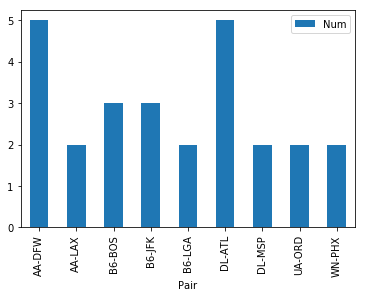

In [25]:
# TODO: bar chart for bad flights
import matplotlib.pyplot as plt
bad_flight.plot.bar(x='Pair',y='Num')

## Step 5.2.4

In [26]:
# TODO: delayed flights by airline

In [27]:
flights_s_df3= flights_s_df1[(flights_s_df1['ArrDelayMinutes'] >= 30) | (flights_s_df1['Cancelled'] >=1)].reset_index()
trairl = flights_s_df3.groupby(['airline_iata_icao']).count()

ta = trairl.sort_values(by=['index'],ascending=[False]).reset_index()
bad_flight_line = ta[['airline_iata_icao','index']].reset_index()

bad_flight_line.columns=['Index','airline_iata','count']
print(bad_flight_line.head())

   Index airline_iata  count
0      0           DL     15
1      1           AA     12
2      2           WN     12
3      3           B6     11
4      4           UA      8
